In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

# darkgrid, whitegrid, dark, white, ticks
# talk, paper, notebook, poster
sns.reset_defaults()
sns.set_theme(rc={'figure.dpi': 72, 'savefig.dpi': 300,
              'figure.autolayout': True})
sns.set_style('ticks')
sns.set_context('paper')

df = pd.read_csv('data/aliasing.csv')
x = df['Variable']
y = df['Target']


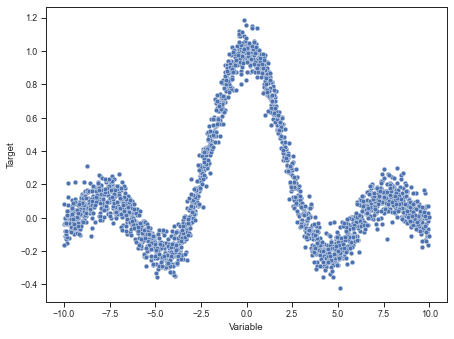

In [46]:
# Part a
sns.scatterplot(x=x, y=y)
plt.savefig('P3_a.png')
plt.show()

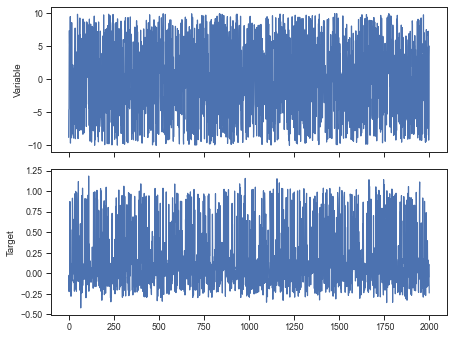

In [47]:
# Part b
fig, ax = plt.subplots(2, 1, sharex=True)
sns.lineplot(x=range(len(x)), y=x, ax=ax[0])
sns.lineplot(x=range(len(y)), y=y, ax=ax[1])
plt.savefig('P3_b.png')
plt.show()

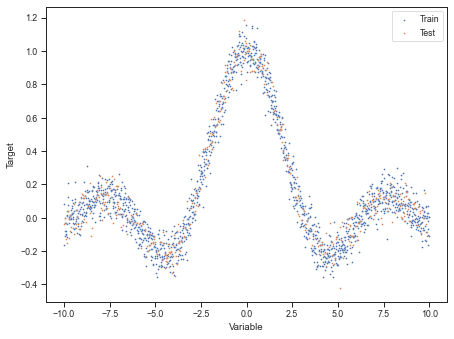

In [48]:
# Part c
def split_data(x, y, test_size):
    tslen = int(test_size * len(y))
    x_test = x.iloc[:tslen]
    x_train = x.iloc[tslen:]
    y_test = y.iloc[:tslen]
    y_train = y.iloc[tslen:]
    return x_train, x_test, y_train, y_test


x_train, x_test, y_train, y_test = split_data(x, y, 0.2)
sns.scatterplot(x=x_train, y=y_train, label="Train", s=3)
sns.scatterplot(x=x_test, y=y_test, label="Test", s=3)
plt.legend()
plt.savefig('P3_c.png')
plt.show()


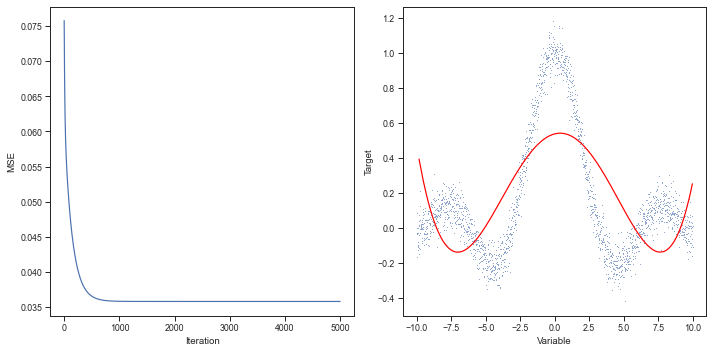

In [59]:
# Part d
def prep(x, deg):
    x = (x - np.mean(x)) / np.std(x)
    x = np.vstack((np.ones(x.shape), x))
    for i in range(2, deg + 1):
        x = np.vstack((x, x[1, :]**i))
    return x.T


def h(x, w):
    return x.dot(w)


def mse(x, y, w):
    m = len(y)
    p = h(x, w)
    err = np.sum((p - y) ** 2) / 2 / m
    return err


def RegressionTrainerGD(x, y, learning_rate=0.01, iteration=1000, degree=1, l2=0):
    m = len(x)
    w = np.zeros(degree + 1)
    e = [0] * iteration
    x = prep(x, degree)
    for it in range(iteration):
        g = x.T.dot(h(x, w) - y) + 2 * l2 * np.sum(w)
        w = w - learning_rate * g
        e[it] = mse(x, y, w)
        if it % int(iteration / 2) == 0:
            learning_rate *= 0.007 if degree > 9 else 0.85
    return w, e


DEGREE = 5
ITERATION = 5000
LEARNING_RATE = 5e-5
L2 = 0

w, e = RegressionTrainerGD(
    x_train.values, y_train.values, learning_rate=LEARNING_RATE, iteration=ITERATION, degree=DEGREE, l2=L2
)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=range(len(e)), y=e, ax=ax[0])
ax[0].set(xlabel='Iteration', ylabel='MSE')
sns.scatterplot(x=x, y=y, s=1, ax=ax[1])
sns.lineplot(x=x_test, y=h(prep(x_test.values, DEGREE), w),
             color='red', ax=ax[1])
fig.savefig('P3_d.png')
plt.show()


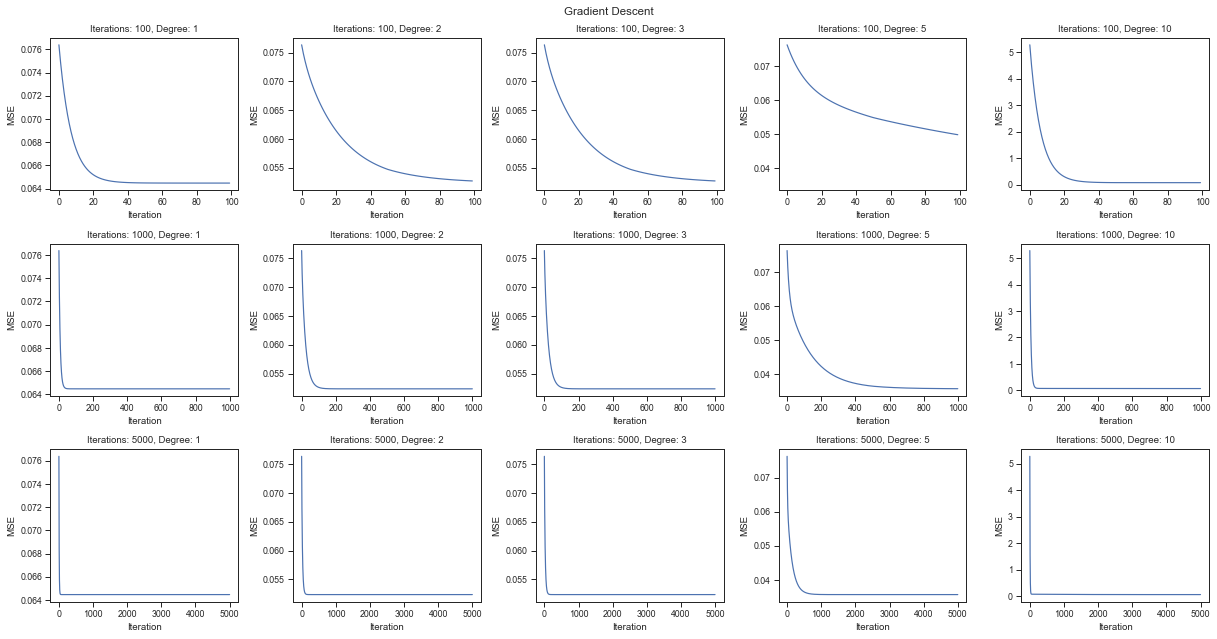

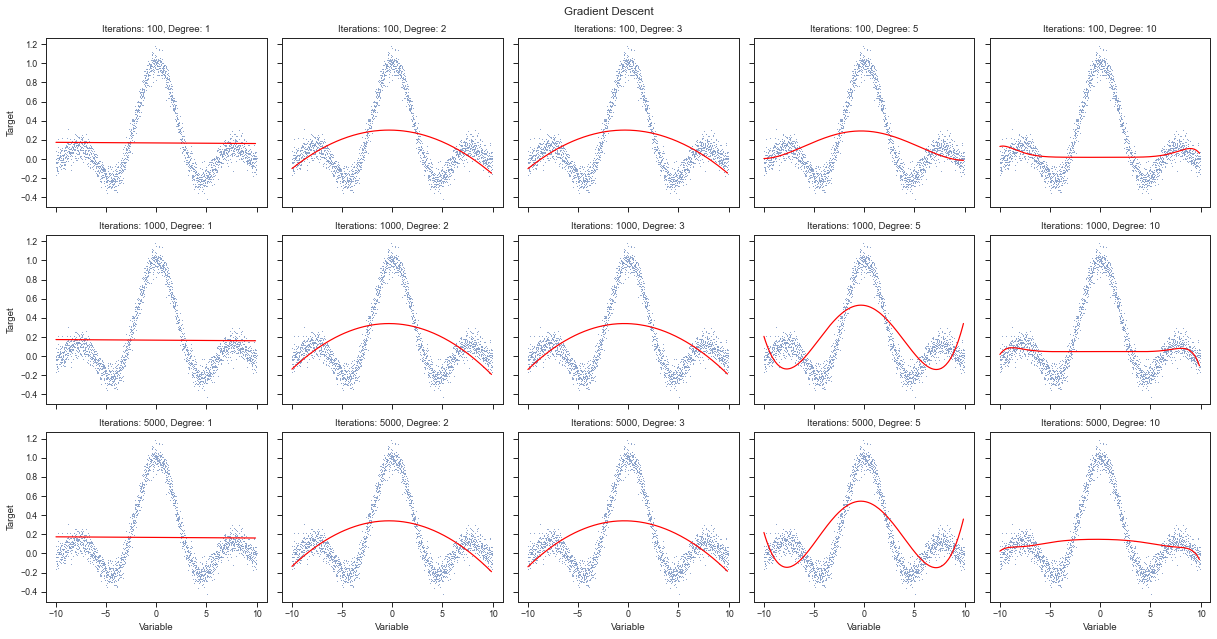

In [50]:
# Part e
ITERATIONS = (100, 1000, 5000)
DEGREES = (1, 2, 3, 5, 10)

fig1, ax1 = plt.subplots(len(ITERATIONS), len(
    DEGREES), sharey='col', figsize=(17, 9))
fig2, ax2 = plt.subplots(len(ITERATIONS), len(
    DEGREES), sharey='all', sharex='all', figsize=(17, 9))
for i, I in enumerate(ITERATIONS):
    for d, D in enumerate(DEGREES):
        w, e = RegressionTrainerGD(
            x_train.values, y_train.values, learning_rate=5e-5, iteration=I, degree=D
        )
        sns.lineplot(x=range(I), y=e, ax=ax1[i, d])
        ax1[i, d].set_title(f'Iterations: {I}, Degree: {D}')
        ax1[i, d].set(xlabel='Iteration', ylabel='MSE')
        sns.scatterplot(x=x, y=y, s=1, ax=ax2[i, d])
        sns.lineplot(x=x_test, y=h(prep(x_test.values, D), w),
                     color='red', ax=ax2[i, d])
        ax2[i, d].set_title(f'Iterations: {I}, Degree: {D}')
fig1.suptitle('Gradient Descent')
fig2.suptitle('Gradient Descent')
fig1.savefig('P3_e1.png')
fig2.savefig('P3_e2.png')
plt.show()


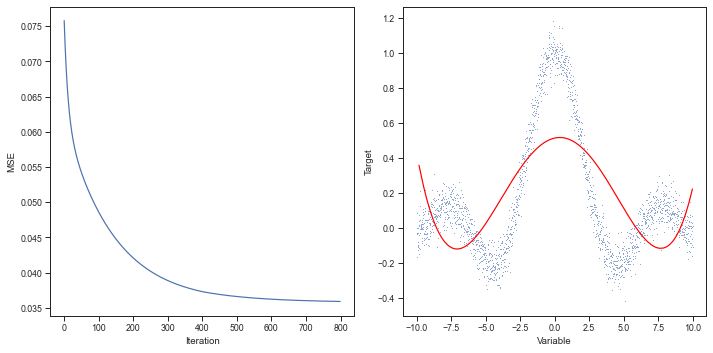

In [62]:
# Part f
DEGREE = 5
ITERATION = 800
LEARNING_RATE = 5e-5
L2 = 0

w, e = RegressionTrainerGD(
    x_train.values, y_train.values, learning_rate=LEARNING_RATE, iteration=ITERATION, degree=DEGREE, l2=L2
)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=range(len(e)), y=e, ax=ax[0])
ax[0].set(xlabel='Iteration', ylabel='MSE')
sns.scatterplot(x=x, y=y, s=1, ax=ax[1])
sns.lineplot(x=x_test, y=h(prep(x_test.values, DEGREE), w),
             color='red', ax=ax[1])
fig.savefig('P3_f.png')
plt.show()


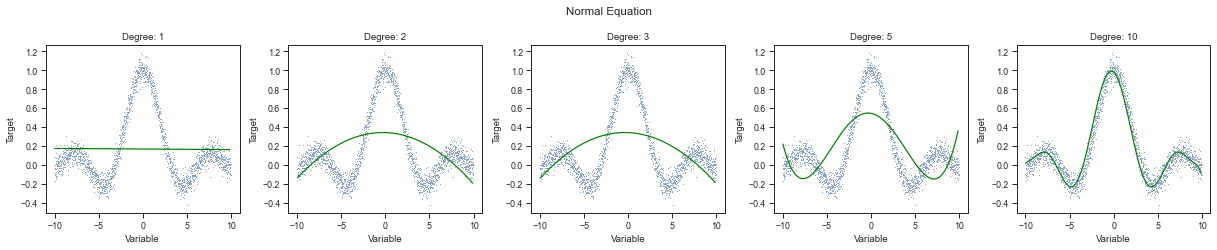

In [51]:
# Part g
def RegressionTrainerNQ(x, y, degree=1):
    x = prep(x, degree)
    w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    e = mse(x, y, w)
    return w, e


fig, ax = plt.subplots(1, len(DEGREES), sharey='col', figsize=(17, 3.5))
for d, D in enumerate(DEGREES):
    w, e = RegressionTrainerNQ(
        x_train.values, y_train.values, degree=D
    )
    sns.scatterplot(x=x, y=y, s=1, ax=ax[d])
    sns.lineplot(x=x_test, y=h(prep(x_test.values, D), w),
                 color='green', ax=ax[d])
    ax[d].set_title(f'Degree: {D}')
fig.suptitle('Normal Equation')
fig.savefig('P3_g.png')
plt.show()


Lambda: 0.1, 5-fold CV, MSE: 0.03722 ± 0.00048


Lambda: 10, 5-fold CV, MSE: 0.03719 ± 0.00046


Lambda: 100, 5-fold CV, MSE: 0.03706 ± 0.00034


Lambda: 1000, 5-fold CV, MSE: 0.03690 ± 0.00022


Lambda: 10000, 5-fold CV, MSE: 0.03687 ± 0.00020


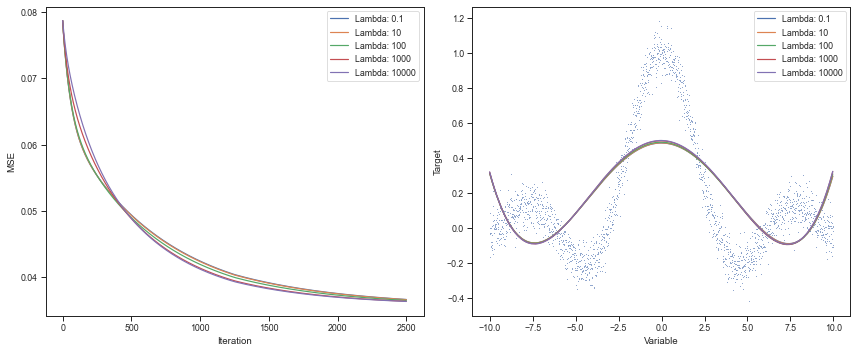

In [58]:
# Part h
def kfold(x, y, k=5):
    s = len(y) // k
    for i in range(k):
        si = i * s
        ei = (i + 1) * s
        x_test = x.iloc[si:ei]
        x_train = pd.concat([x.iloc[:si], x.iloc[ei:]], axis=0)
        y_test = y.iloc[si:ei]
        y_train = pd.concat([y.iloc[:si], y.iloc[ei:]], axis=0)
        yield x_train, x_test, y_train, y_test


K = 5
DEGREE = 4
ITERATION = 2500
LEARNING_RATE = 1e-5
L2 = (0.1, 10, 100, 1000, 10000)


fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=x, y=y, s=1, ax=ax[1])
ax[0].set(xlabel='Iteration', ylabel='MSE')
for l2 in L2:
    min_error = float('inf')
    errors = []
    min_w = []
    min_e = []
    min_x = []
    min_y = []
    for x_train, x_test, y_train, y_test in kfold(x, y, k=K):
        w, e = RegressionTrainerGD(
            x_train.values, y_train.values, learning_rate=LEARNING_RATE, iteration=ITERATION, degree=DEGREE, l2=l2
        )
        error = mse(prep(x_test.values, deg=DEGREE), y_test.values, w)
        errors.append(error)
        if error < min_error:
            min_error = error
            min_w = w
            min_e = e
            min_x = x_test
            min_y = y_test
    sns.lineplot(x=range(len(min_e)), y=min_e, label=f'Lambda: {l2}', ax=ax[0])
    sns.lineplot(x=min_x, y=h(prep(min_x.values, DEGREE), min_w),
                 label=f'Lambda: {l2}', ax=ax[1])
    print(
        f'Lambda: {l2}, {K}-fold CV, MSE: {np.mean(errors):.5f} ± {np.std(errors):.5f}')
fig.savefig('P3_h.png')
plt.show()
